In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Train Set - Train Set.csv')
df

,Region_Name,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12,Month 13,Month 14,Month 15,Month 16,Month 17,Month 18,Month 19,Month 20,Month 21,Month 22,Month 23,Month 24,Month 25,Month 26,Month 27,Month 28,Month 29,Month 30,Month 31,Month 32,Month 33,Month 34,Month 35,Month 36,Month 37,Month 38,Month 39,Month 40,Month 41,Month 42,Month 43,Month 44,Month 45,Month 46,Month 47,Month 48,Month 49,Month 50,Month 51,Month 52,Month 53,Month 54,Month 55,Month 56,Month 57,Month 58,Month 59,Month 60,Month 61,Month 62,Month 63,Month 64,Month 65,Month 66,Month 67,Month 68,Month 69,Month 70,Month 71,Month 72
0,Region 1,0.154324,0.122901,0.127583,0.501557,0.103551,0.051983,0.140272,0.157586,0.182546,0.181801,-0.013496,0.213958,0.202585,0.256381,0.327656,0.277944,0.200623,0.141673,0.133457,0.092708,0.124225,0.199409,0.211584,0.256088,0.046845,0.050224,0.044738,0.049602,0.185713,0.141933,0.032244,0.101614,0.202953,0.185604,0.083222,0.097904,0.241120,0.264636,0.253286,0.422999,0.464442,0.316720,0.224314,0.338289,0.378352,0.520046,0.391280,0.314726,0.270200,0.362765,0.376728,0.394986,0.347692,0.351117,0.375120,0.289649,0.372379,0.398122,0.362610,0.263766,0.275622,0.252173,0.336913,0.321828,0.321895,0.337018,0.121581,0.234171,0.294693,0.373754,0.333642,0.242176
1,Region 2,0.119708,0.119831,0.112970,0.326049,0.098852,0.041502,0.116759,0.136964,0.178476,0.162621,-0.017723,0.227958,0.181563,0.247475,0.488062,0.290772,0.196146,0.139117,0.108014,0.091059,0.122529,0.202530,0.206454,0.243916,0.030216,0.057625,0.037567,0.047221,0.175260,0.121241,-0.009893,0.066981,0.191505,0.170095,0.057635,0.075968,0.216270,0.233841,0.245432,0.407445,0.437820,0.332397,0.238877,0.318503,0.366288,0.502219,0.360538,0.294045,0.241370,0.334915,0.359444,0.378980,0.306557,0.350775,0.342869,0.272034,0.344482,0.372061,0.318767,0.221102,0.221851,0.191496,0.283412,0.302669,0.306597,0.327412,0.124563,0.218367,0.275179,0.344997,0.300503,0.215147
2,Region 3,0.178236,0.165497,0.190754,0.321733,0.203126,0.048345,0.180064,0.176990,0.224173,0.223810,0.070306,0.314094,0.253627,0.317007,0.493548,0.356269,0.301312,0.295783,0.213944,0.225560,0.199628,0.295161,0.301142,0.369074,0.148873,0.148648,0.141286,0.176595,0.298081,0.247686,0.073358,0.167071,0.369198,0.273285,0.166522,0.232556,0.324115,0.337240,0.328820,0.488371,0.452943,0.299717,0.276886,0.353269,0.391376,0.575888,0.412834,0.404446,0.315161,0.413679,0.436428,0.452330,0.355533,0.397592,0.429922,0.315471,0.425693,0.437532,0.401876,0.320588,0.310557,0.285627,0.331988,0.377643,0.384990,0.362927,0.230516,0.263643,0.296751,0.400269,0.360406,0.335923
3,Region 4,0.225016,0.220602,0.224240,0.330916,0.268934,0.171322,0.243672,0.219831,0.242115,0.227575,0.068486,0.300100,0.260220,0.339176,0.408422,0.367631,0.374176,0.385319,0.200377,0.308989,0.264775,0.300382,0.328013,0.395487,0.204112,0.210327,0.230464,0.254440,0.428539,0.309254,0.155241,0.227263,0.471488,0.294128,0.162800,0.191990,0.303951,0.360914,0.397259,0.534679,0.493992,0.373266,0.296719,0.367477,0.400149,0.625336,0.415876,0.373174,0.305040,0.419634,0.408965,0.453475,0.325201,0.445034,0.414192,0.308857,0.381268,0.432136,0.366376,0.264211,0.271887,0.248869,0.315252,0.329762,0.352229,0.368514,0.192878,0.228902,0.291502,0.364874,0.311379,0.271102
4,Region 5,0.318976,0.316835,0.328486,0.483001,0.380898,0.292074,0.268395,0.326809,0.344086,0.278257,0.187874,0.588132,0.376303,0.429040,0.484136,0.547735,0.458580,0.588121,0.336758,0.398324,0.404609,0.351204,0.421711,0.620374,0.446481,0.354543,0.378399,0.423216,0.478113,0.386218,0.323202,0.331631,0.547656,0.383964,0.226795,0.392175,0.430364,0.439188,0.421460,0.672617,0.556797,0.527481,0.380318,0.429014,0.463007,0.671208,0.487795,0.500731,0.328601,0.450884,0.471953,0.506876,0.388457,0.417775,0.470368,0.363075,0.410614,0.482598,0.408525,0.381367,0.336923,0.288830,0.366314,0.392924,0.370159,0.422587,0.282631,0.289498,0.368923,0.416527,0.372523,0.392835
...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
data = []
for x in range(72):
  data.append(df.iloc[0,1:][x])
min(data)

-0.013495568000000001

In [ ]:
data_modified = []
for y in range(3915):
  l=[]
  for x in range(72):
    if df.iloc[y,1:][x] <= 0:
      y=0.0001
    else:
      y=df.iloc[y,1:][x]
    l.append(y)
  data_modified.append(l)
data_modified

[0.15432449999999998,
 0.122900762,
 0.127582778,
 0.501556809,
 0.103551004,
 0.051983348,
 0.14027175,
 0.157586219,
 0.182546265,
 0.18180113899999997,
 0.0001,
 0.213958137,
 0.20258455399999997,
 0.256381304,
 0.327656008,
 0.277943595,
 0.20062283,
 0.141673204,
 0.133457062,
 0.092708141,
 0.12422531199999999,
 0.199408681,
 0.21158379,
 0.25608765699999997,
 0.046845207,
 0.05022351,
 0.044738229000000004,
 0.04960181,
 0.185712847,
 0.141932711,
 0.032244437,
 0.101613543,
 0.202953333,
 0.18560383600000002,
 0.083222397,
 0.09790355699999999,
 0.24112034699999998,
 0.264635835,
 0.253286318,
 0.422998892,
 0.464442133,
 0.316720277,
 0.22431353,
 0.33828919799999996,
 0.37835167,
 0.520046195,
 0.391280342,
 0.314726359,
 0.27020041100000003,
 0.362764835,
 0.376728136,
 0.394985834,
 0.347692034,
 0.351116516,
 0.37512038,
 0.289648674,
 0.372379191,
 0.398122331,
 0.362610296,
 0.26376623,
 0.275621955,
 0.252173296,
 0.33691267399999997,
 0.321828391,
 0.321894625,
 0.3370

In [ ]:
df1 = pd.DataFrame({'Data':data})
df1['Date'] = pd.date_range(start='1/1/1979', periods=72, freq='MS')
df1 = df1.set_index('Date')
df1

,Data
Date,
1979-01-01,0.154324
1979-02-01,0.122901
1979-03-01,0.127583
1979-04-01,0.501557
1979-05-01,0.103551
...,...
1984-08-01,0.234171
1984-09-01,0.294693
1984-10-01,0.373754


In [ ]:
df1_modified = pd.DataFrame({'Data':data_modified})
df1_modified['Date'] = pd.date_range(start='1/1/1979', periods=72, freq='MS')
df1_modified = df1_modified.set_index('Date')
df1_modified

,Data
Date,
1979-01-01,0.154324
1979-02-01,0.122901
1979-03-01,0.127583
1979-04-01,0.501557
1979-05-01,0.103551
...,...
1984-08-01,0.234171
1984-09-01,0.294693
1984-10-01,0.373754


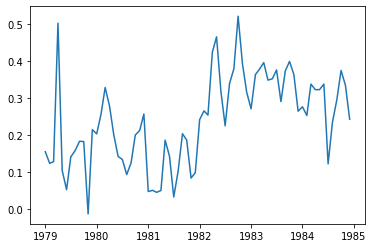

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


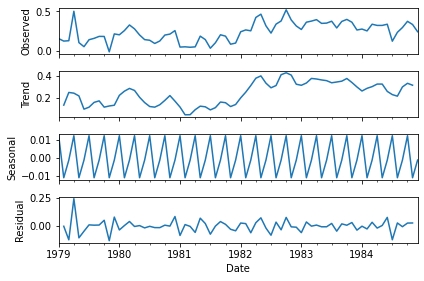

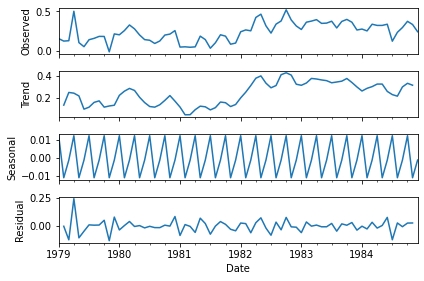

In [ ]:
seasonal_decompose(df1, freq=3).plot()

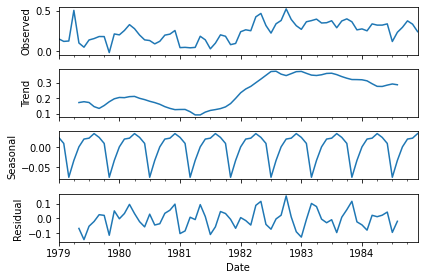

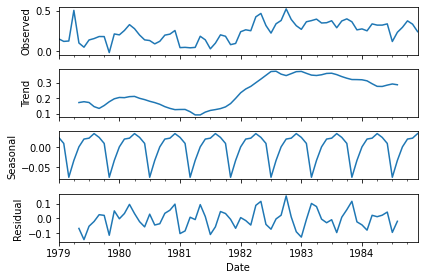

In [ ]:
seasonal_decompose(df1, freq=8).plot()

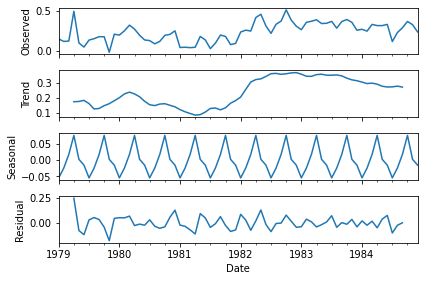

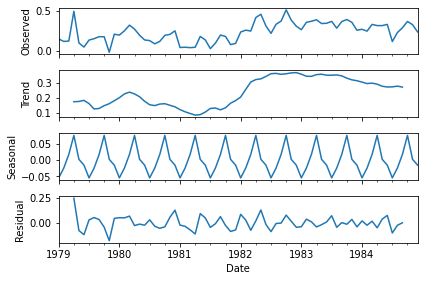

In [ ]:
seasonal_decompose(df1, freq=6).plot()

In [ ]:
train = df1[0:61]
test = df1[61:73]

In [ ]:
train_modified = df1_modified[0:61]
test_modified = df1_modified[61:73]

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import numpy as np

In [ ]:
model = SimpleExpSmoothing(train_modified)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
fit1 = model.fit()
pred1 = fit1.forecast(12)
pred1

1984-02-01    0.313521
1984-03-01    0.313521
1984-04-01    0.313521
1984-05-01    0.313521
1984-06-01    0.313521
1984-07-01    0.313521
1984-08-01    0.313521
1984-09-01    0.313521
1984-10-01    0.313521
1984-11-01    0.313521
1984-12-01    0.313521
1985-01-01    0.313521
Freq: MS, dtype: float64

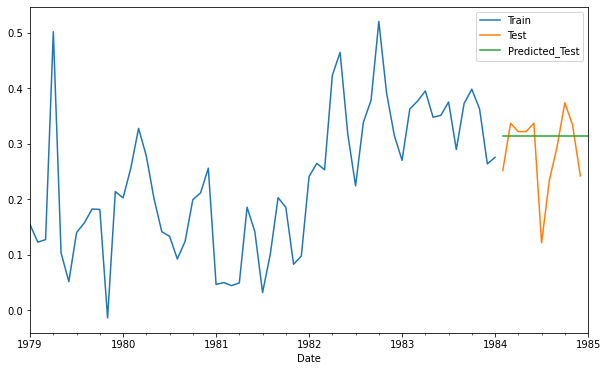

In [ ]:
train['Data'].plot(legend=True, label='Train', figsize=(10,6))
test['Data'].plot(legend=True, label='Test')
pred1.plot(legend=True, label='Predicted_Test')

In [ ]:
model = Holt(train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(12)
pred2

1984-02-01    0.324507
1984-03-01    0.327122
1984-04-01    0.329738
1984-05-01    0.332353
1984-06-01    0.334969
1984-07-01    0.337584
1984-08-01    0.340200
1984-09-01    0.342815
1984-10-01    0.345431
1984-11-01    0.348046
1984-12-01    0.350661
1985-01-01    0.353277
Freq: MS, dtype: float64

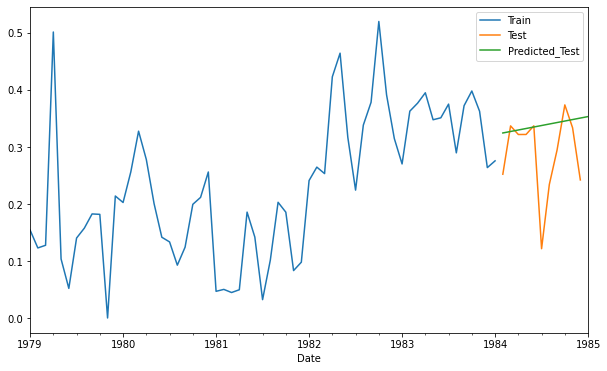

In [ ]:
train_modified['Data'].plot(legend=True, label='Train', figsize=(10,6))
test_modified['Data'].plot(legend=True, label='Test')
pred2.plot(legend=True, label='Predicted_Test')

In [ ]:
model = ExponentialSmoothing(train_modified, trend="add", seasonal="mul", seasonal_periods=6)
# model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
fit = model.fit()
pred = fit.forecast(12)
pred

1984-02-01    0.251903
1984-03-01    0.320569
1984-04-01    0.350343
1984-05-01    0.320573
1984-06-01    0.257067
1984-07-01    0.290315
1984-08-01    0.251903
1984-09-01    0.320569
1984-10-01    0.350343
1984-11-01    0.320573
1984-12-01    0.257067
1985-01-01    0.290315
Freq: MS, dtype: float64

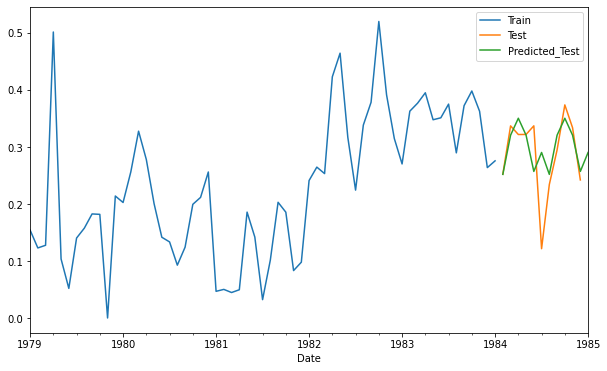

In [ ]:
train_modified['Data'].plot(legend=True, label='Train', figsize=(10,6))
test_modified['Data'].plot(legend=True, label='Test')
pred.plot(legend=True, label='Predicted_Test')